In [2]:
from scapy.all import *
from pprint import pprint
import sys
import numpy as np
import os
import dpkt
import matplotlib.pyplot as plt

KEYLEN=8

UNCOMPRESSED_PKT_SIZE = 1000
COMPRESSED_PKT_SIZE = 977.6
MAX_LINE_RATE =10e9


In [3]:
def read_pcap_with_pkt(out_dir, dst_mac_is_ts = True, try_compare_counters = True):
    
    if try_compare_counters:
        count_file = os.path.join(out_dir, 'counters_0.out')
        for line in open(count_file):
            if line.startswith('7/0'):
                print("counters_0.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_start_pkts = int(n_pkts_str[:-1])
        count_file = os.path.join(out_dir, 'counters_1.out')
        for line in open(count_file):
            if line.startswith('7/0'):
                print("counters_1.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_end_pkts = int(n_pkts_str[:-1])   
        n_expected_pkts = (n_end_pkts - n_start_pkts)
        
        print("Expecting {} packets".format(n_expected_pkts))
    
    
    pcf = os.path.join(out_dir, 'moongen', 'moongen.pcap')
    
    counters = {
        'other': 0,
        'packet': 0,
    }

    f = open(pcf, 'rb')
    
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    total_size = 0
    pkt_ingress = []
    pkt_egress = []
    pkt_throughput = []
    all_packets = []
    
           
    f = open(pcf, 'rb')
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    
    for ts, buf in pcap:
        try:
            eth=dpkt.ethernet.Ethernet(buf)
            ip=eth.data
            
            #TODO: Add a check to distinguish ingress and egress packets
            # If ingress, add to input array.
            # If egress, add to output array
            if ((eth.type != 0x0800) and (eth.type != 0x86dd) and (eth.type != 0x88cc)):
                y3, y2, y1 = struct.unpack("!HHH", eth.src)
                if(y3 == 0x00 and y2 == 0x00 and y1 == 0x01):
                    counters['other'] += 1
                else:
                    continue
            
        except Exception as e:
            print("Exception parsing packet {} : {}".format(buf, e))
            Ether(buf).show2()
            raise
        
        if dst_mac_is_ts:
            x3, x2, x1 = struct.unpack("!HHH", eth.dst)
    
            if (counters['other'] == 1):
                ts_init = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
                #ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
                pkt_throughput.append(ts_init)
           
                    
            ts_last = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
            #ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
            
    
        pkt_throughput.append(ts_last)

    print(pkt_throughput)
    #all_packets.append(pkt_ingress)
    #all_packets.append(pkt_egress)
    print(counters['other'])
    #return lists of arrays for ingress and egress packets.
    #return all_packets
    length = len(pkt_throughput)
    time_elapsed = pkt_throughput[length - 2] - pkt_throughput[2]
    
    print(time_elapsed)

    #return 1

In [4]:
def read_pcap_old(out_dir, dst_mac_is_ts = True, try_compare_counters = True):
    
    if try_compare_counters:
        count_file = os.path.join(out_dir, 'counters_0.out')
        for line in open(count_file):
            if line.startswith('5/0'):
                print("counters_0.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_start_pkts = int(n_pkts_str[:-1])
        count_file = os.path.join(out_dir, 'counters_1.out')
        for line in open(count_file):
            if line.startswith('5/0'):
                print("counters_1.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_end_pkts = int(n_pkts_str[:-1])   
        n_expected_pkts = (n_end_pkts - n_start_pkts)
        
        print("Expecting {} packets".format(n_expected_pkts))
    
    
    pcf = os.path.join(out_dir, 'moongen', 'moongen.pcap')
    
    counters = {
        'other': 0,
        'packet': 0,
    }

    f = open(pcf, 'rb')
    
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    total_size = 0
    pkt_ingress = []
    pkt_egress = []
    pkt_throughput = []
    all_packets = []
    
           
    f = open(pcf, 'rb')
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    
    for ts, buf in pcap:
        try:
            eth=dpkt.ethernet.Ethernet(buf)
            ip=eth.data
            #print(ip.len)
            
            #TODO: Add a check to distinguish ingress and egress packets
            # If ingress, add to input array.
            # If egress, add to output array
            if ((eth.type != 0x0800) and (eth.type != 0x86dd) and (eth.type != 0x88cc)):
                
                if(y3 == 0x00 and y2 == 0x00 and y1 == 0x02):
                    counters['other'] += 1
                else:
                    continue
            
        except Exception as e:
            print("Exception parsing packet {} : {}".format(buf, e))
            Ether(buf).show2()
            raise
        
        if dst_mac_is_ts:
            x3, x2, x1 = struct.unpack("!HHH", eth.dst)
    
            if (counters['other'] == 1):
                ts_init = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
                #ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
                pkt_throughput.append(ts_init)
           
                    
            ts_last = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
            #ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
            
    
        pkt_throughput.append(ts_last)

    #print(pkt_throughput)
    #all_packets.append(pkt_ingress)
    #all_packets.append(pkt_egress)
    print(counters['other'])
    #return lists of arrays for ingress and egress packets.
    #return all_packets
    length = len(pkt_throughput)
    time_elapsed = pkt_throughput[length - 1] - pkt_throughput[0]
    
    print(time_elapsed)

    #return 1

In [5]:
def get_latency(out_dir, dst_mac_is_ts=True):
    
    pcf = os.path.join(out_dir, 'moongen', 'moongen.pcap')
    
    counters = {
        'ingress': 0,
        'egress': 0,
    }

    f = open(pcf, 'rb')
    
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    total_size = 0
    pkt_ingress = []
    pkt_egress = []
    pkt_latency = []
    
    for ts, buf in pcap:
        try:
            eth=dpkt.ethernet.Ethernet(buf)
            
            #ip=eth.data
            
            #TODO: Add a check to distinguish ingress and egress packets
            # If ingress, add to input array.
            # If egress, add to output array
            
            if ((eth.type != 0x86dd) and (eth.type != 0x88cc)):
                y3, y2, y1 = struct.unpack("!HHH", eth.src)
                if (y3 == 0x00 and y2 == 0x00 and y1 == 0x01):
                    counters['egress'] += 1
                elif (y3 == 0x00 and y2 == 0x00 and y1 == 0x02):    
                    counters['ingress'] += 1
            else:
                continue
            
        except Exception as e:
            print("Exception parsing packet {} : {}".format(buf, e))
            Ether(buf).show2()
            raise

        if dst_mac_is_ts:
            x3, x2, x1 = struct.unpack("!HHH", eth.dst)
            ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
            
            y3, y2, y1 = struct.unpack("!HHH", eth.src)
            if(y3 == 0x00 and y2 == 0x00 and y1 == 0x01):
                pkt_egress.append(ts)
            elif (y3 == 0x00 and y2 == 0x00 and y1 == 0x02):    
                pkt_ingress.append(ts)
     
    print(counters['ingress'])
    print(counters['egress']) 
    
    length = len(pkt_ingress)
    i = 0
    while (i < length):
        pkt_latency.append(pkt_egress[i] - pkt_ingress[i])
        i += 1
        
    i = 0
    tot = 0
    
    plt.figure()
    plt.plot(pkt_latency, 'bo')
    
    for val in pkt_latency:
        tot += val
    
    print(tot)
    print(length)
    avg = tot / length

    print(avg)
    #return avg
   

In [6]:
def read_pcap(out_dir, dst_mac_is_ts = True, try_compare_counters = True, compress = True):
    
    if try_compare_counters:
        count_file = os.path.join(out_dir, 'counters_0.out')
        for line in open(count_file):
            if line.startswith('5/0'):
                print("counters_0.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_start_pkts = int(n_pkts_str[:-1])
        count_file = os.path.join(out_dir, 'counters_1.out')
        for line in open(count_file):
            if line.startswith('5/0'):
                print("counters_1.out successfully opened")
                n_pkts_str = line.split()[-1]
                n_end_pkts = int(n_pkts_str[:-1])   
        n_expected_pkts = (n_end_pkts - n_start_pkts)
        
        print("Expecting {} packets".format(n_expected_pkts))
    
    
    pcf = os.path.join(out_dir, 'moongen', 'moongen.pcap')
    
    counters = {
        'ingress': 0,
        'egress': 0,
    }

    total_osize = 0
    total_isize = 0
    pkt_othroughput = []
    pkt_ithroughput = []
    pkt_ithroughput.append(1000)
    pkt_ithroughput.append(2000)
    pkt_othroughput.append(1000)
    pkt_othroughput.append(2000)
    
    f = open(pcf, 'rb')
    print("Reading {}".format(pcf))
    pcap=dpkt.pcap.Reader(f)
    
    for ts, buf in pcap:
        try:
            eth=dpkt.ethernet.Ethernet(buf)
            ip=eth.data
            
            #TODO: Add a check to distinguish ingress and egress packets
            # If ingress, add to input array.
            # If egress, add to output array
            
            if eth.src == b'\x00\x00\x00\x00\x00\x02':
                counters['ingress'] += 1
            else:
                counters['egress'] += 1

            if dst_mac_is_ts:
                x3, x2, x1 = struct.unpack("!HHH", eth.dst)
                ts = float((x3 << 32) | (x2 << 16) | x1) * 1e-9
                if eth.src == b'\x00\x00\x00\x00\x00\x01':
                    if ts <= pkt_othroughput[0]:
                        pkt_othroughput[0] = ts
                    pkt_othroughput[1] = ts
                    
                
                elif eth.src == b'\x00\x00\x00\x00\x00\x02':
                    if ts <= pkt_ithroughput[0]:
                        pkt_ithroughput[0] = ts
                    pkt_ithroughput[1] = ts  
                    

        except Exception as e:
            print("Exception parsing packet {} : {}".format(buf, e))
            Ether(buf).show2()
            raise
    if compress:
        total_isize = (counters['ingress'] * 1000)    #10 packets of size 10000bytes
        total_osize = (counters['egress'] * 977.6)     #10 packets compressed to 9776bytes
    else:
        total_isize = (counters['ingress'] * 977.6)    #10 packets of size 9776bytes
        total_osize = (counters['egress'] * 1000)     #10 packets decompressed to 10000bytes
    print("Total input bytes: " + str(total_isize))
    print("Total output bytes: " + str(total_osize))
    print("Input throughput start, end: " + str(pkt_ithroughput))
    print("Output start, end " + str(pkt_othroughput))
    
    in_tput = ((total_isize * 8) / (pkt_ithroughput[1] - pkt_ithroughput[0]))
    out_tput = ((total_osize * 8) / (pkt_othroughput[1] - pkt_othroughput[0]))
    
    ipps = (counters['ingress'] / (pkt_ithroughput[1] - pkt_ithroughput[0]))
    opps = (counters['egress'] / (pkt_othroughput[1] - pkt_othroughput[0]))
    
    print("Input throughput " + str(in_tput))
    print("Output throughput " + str(out_tput))
    
    print("Input pps: %d" %(ipps))
    print("Output pps: %d" %(opps))

counters_0.out successfully opened
counters_1.out successfully opened
Expecting 20000 packets
Reading /home/ncshy/P4Boosters/testing/HdrCompression/execution/test_rerun/fpga_decompress/fpga_decompress_94.00/moongen/moongen.pcap
Total input bytes: 9776000.0
Total output bytes: 10000000
Input throughput start, end: [49.861635391, 49.870249552000004]
Output start, end [49.86163972000001, 49.870254204000005]
Input throughput 9079003747.429682
Output throughput 9286685075.97327
Input pps: 1160879
Output pps: 1160835
Reading /home/ncshy/P4Boosters/testing/HdrCompression/execution/test_rerun/fpga_decompress/fpga_decompress_94.00/moongen/moongen.pcap
10000
10000
0.0503065619999532
10000
5.0306561999953205e-06


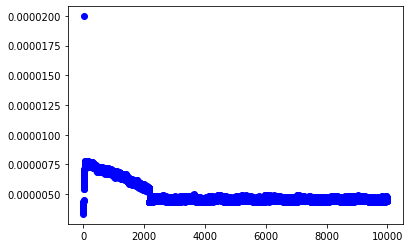

In [7]:
out_dir = "/home/ncshy/P4Boosters/testing/HdrCompression/execution/test_rerun/fpga_decompress/fpga_decompress_94.00"
#read_pcap_with_pkt(out_dir, True, True)
#Set compress to True for Compressor and False for decompressor
compress = False
read_pcap(out_dir, True, True, compress)
get_latency(out_dir, True)